In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

In [85]:
testdata=pd.read_csv('test_loan_data (1).csv')

In [86]:
traindata=pd.read_csv('train_loan_data (1).csv')

In [87]:
testdata.head()


addr_state  annual_inc earliest_cr_line emp_length  \
0         MO     50000.0         May-2012     1 year   
1         HI     92000.0         Dec-2001  10+ years   
2         TX     89000.0         Mar-1989  10+ years   
3         CA     33000.0         Nov-2004    9 years   
4         MI     35580.0         Feb-1997        NaN   

                           emp_title  fico_range_high  fico_range_low grade  \
0                   Tower technician            719.0           715.0     C   
1                         Supervisor            684.0           680.0     B   
2            APPLICATIONS PROGRAMMER            679.0           675.0     B   
3  San Diego Unified School District            674.0           670.0     C   
4                                NaN            704.0           700.0     B   

  home_ownership application_type  ... pub_rec  pub_rec_bankruptcies  \
0            OWN       Individual  ...     0.0                   0.0   
1           RENT       Individual  ...     0.0                   0.0   
2       MORTGAGE       Individual  ...     0.0                   0.0   
3           RENT       Individual  ...     1.0                   1.0   
4       MORTGAGE       Individual  ...     0.0                   0.0   

              purpose  revol_bal  revol_util  sub_grade        term  \
0  debt_consolidation     2568.0         9.8         C4   36 months   
1  debt_consolidation    30394.0        75.4         B2   36 months   
2         credit_card    38400.0        75.3         B2   60 months   
3  debt_consolidation    21224.0        69.4         C1   36 months   
4  debt_consolidation     3471.0        39.4         B5   36 months   

                     title  total_acc verification_status  
0       Debt consolidation       11.0     Source Verified  
1       Debt consolidation       35.0     Source Verified  
2  Credit card refinancing       41.0        Not Verified  
3           Breathing Room       16.0        Not Verified  
4       debitconsolidation       19.0            Verified  

[5 rows x 27 columns]

In [222]:
testdata.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

In [88]:
traindata.head()

addr_state  annual_inc earliest_cr_line emp_length  \
0         CO     85000.0           Jul-97  10+ years   
1         CA     40000.0           Apr-87  10+ years   
2         FL     60000.0           Aug-07  10+ years   
3         IL    100742.0           Sep-80  10+ years   
4         MD     80000.0           Jul-99  10+ years   

                        emp_title  fico_range_high  fico_range_low grade  \
0                          Deputy              744             740     E   
1  Department of Veterans Affairs              724             720     B   
2                Marble polishing              679             675     B   
3                         printer              664             660     B   
4                   Southern Mgmt              669             665     F   

  home_ownership application_type  ... pub_rec_bankruptcies  \
0       MORTGAGE       Individual  ...                  0.0   
1           RENT       Individual  ...                  0.0   
2       MORTGAGE       Individual  ...                  0.0   
3       MORTGAGE       Individual  ...                  0.0   
4           RENT       Individual  ...                  0.0   

              purpose  revol_bal  revol_util  sub_grade        term  \
0  debt_consolidation       5338        93.6         E1   60 months   
1  debt_consolidation      19944        60.3         B1   36 months   
2  debt_consolidation      23199        88.5         B5   36 months   
3  debt_consolidation      18425        69.0         B2   36 months   
4  debt_consolidation      34370        90.0         F5   60 months   

                 title  total_acc  verification_status loan_status  
0   Debt consolidation          8      Source Verified   Defaulted  
1          Credit Loan         12             Verified        Paid  
2   Debt consolidation         16      Source Verified        Paid  
3   Debt consolidation         19      Source Verified        Paid  
4  Debt Connsolidation         59             Verified        Paid  

[5 rows x 28 columns]

Test Data does not contain target column

Hence will work on Train data

In [89]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [90]:
traindata.describe()

annual_inc  fico_range_high  fico_range_low      int_rate  \
count  8.000000e+04     80000.000000    80000.000000  80000.000000   
mean   7.604614e+04       699.987975      695.987813     13.232898   
std    6.902006e+04        31.734840       31.734075      4.771705   
min    0.000000e+00       664.000000      660.000000      5.310000   
25%    4.600000e+04       674.000000      670.000000      9.750000   
50%    6.500000e+04       694.000000      690.000000     12.740000   
75%    9.000000e+04       714.000000      710.000000     15.990000   
max    7.141778e+06       850.000000      845.000000     30.990000   

          loan_amnt  num_actv_bc_tl      mort_acc   tot_cur_bal      open_acc  \
count  80000.000000    76052.000000  77229.000000  7.605200e+04  80000.000000   
mean   14403.867813        3.633790      1.674759  1.415864e+05     11.605675   
std     8703.826298        2.262505      2.005104  1.593714e+05      5.483362   
min      750.000000        0.000000      0.000000  0.000000e+00      1.000000   
25%     7925.000000        2.000000      0.000000  2.964200e+04      8.000000   
50%    12000.000000        3.000000      1.000000  8.100050e+04     11.000000   
75%    20000.000000        5.000000      3.000000  2.110272e+05     14.000000   
max    40000.000000       32.000000     32.000000  5.172185e+06     80.000000   

            pub_rec  pub_rec_bankruptcies     revol_bal    revol_util  \
count  80000.000000          79969.000000  8.000000e+04  79947.000000   
mean       0.216675              0.137103  1.628934e+04     51.899142   
std        0.579854              0.383202  2.264915e+04     24.504836   
min        0.000000              0.000000  0.000000e+00      0.000000   
25%        0.000000              0.000000  5.965750e+03     33.500000   
50%        0.000000              0.000000  1.111100e+04     52.200000   
75%        0.000000              0.000000  1.963500e+04     70.800000   
max       24.000000              7.000000  1.023940e+06    152.600000   

          total_acc  
count  80000.000000  
mean      25.036875  
std       12.009194  
min        2.000000  
25%       16.000000  
50%       23.000000  
75%       32.000000  
max      162.000000

Percentage of Missing Values

In [94]:
traindata.isnull().mean().round(4)*100

addr_state              0.00
annual_inc              0.00
earliest_cr_line        0.00
emp_length              5.74
emp_title               6.27
fico_range_high         0.00
fico_range_low          0.00
grade                   0.00
home_ownership          0.00
application_type        0.00
initial_list_status     0.00
int_rate                0.00
loan_amnt               0.00
num_actv_bc_tl          4.94
mort_acc                3.46
tot_cur_bal             4.94
open_acc                0.00
pub_rec                 0.00
pub_rec_bankruptcies    0.04
purpose                 0.00
revol_bal               0.00
revol_util              0.07
sub_grade               0.00
term                    0.00
title                   1.21
total_acc               0.00
verification_status     0.00
loan_status             0.00
dtype: float64

Less than 10% data is missing hence we will drop them

In [99]:
data=traindata.dropna()

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70375 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            70375 non-null  object 
 1   annual_inc            70375 non-null  float64
 2   earliest_cr_line      70375 non-null  object 
 3   emp_length            70375 non-null  object 
 4   emp_title             70375 non-null  object 
 5   fico_range_high       70375 non-null  int64  
 6   fico_range_low        70375 non-null  int64  
 7   grade                 70375 non-null  object 
 8   home_ownership        70375 non-null  object 
 9   application_type      70375 non-null  object 
 10  initial_list_status   70375 non-null  object 
 11  int_rate              70375 non-null  float64
 12  loan_amnt             70375 non-null  int64  
 13  num_actv_bc_tl        70375 non-null  float64
 14  mort_acc              70375 non-null  float64
 15  tot_cur_bal        

In [101]:
data.isnull().sum()

addr_state              0
annual_inc              0
earliest_cr_line        0
emp_length              0
emp_title               0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
purpose                 0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
title                   0
total_acc               0
verification_status     0
loan_status             0
dtype: int64

EDA

<function matplotlib.pyplot.show(close=None, block=None)>

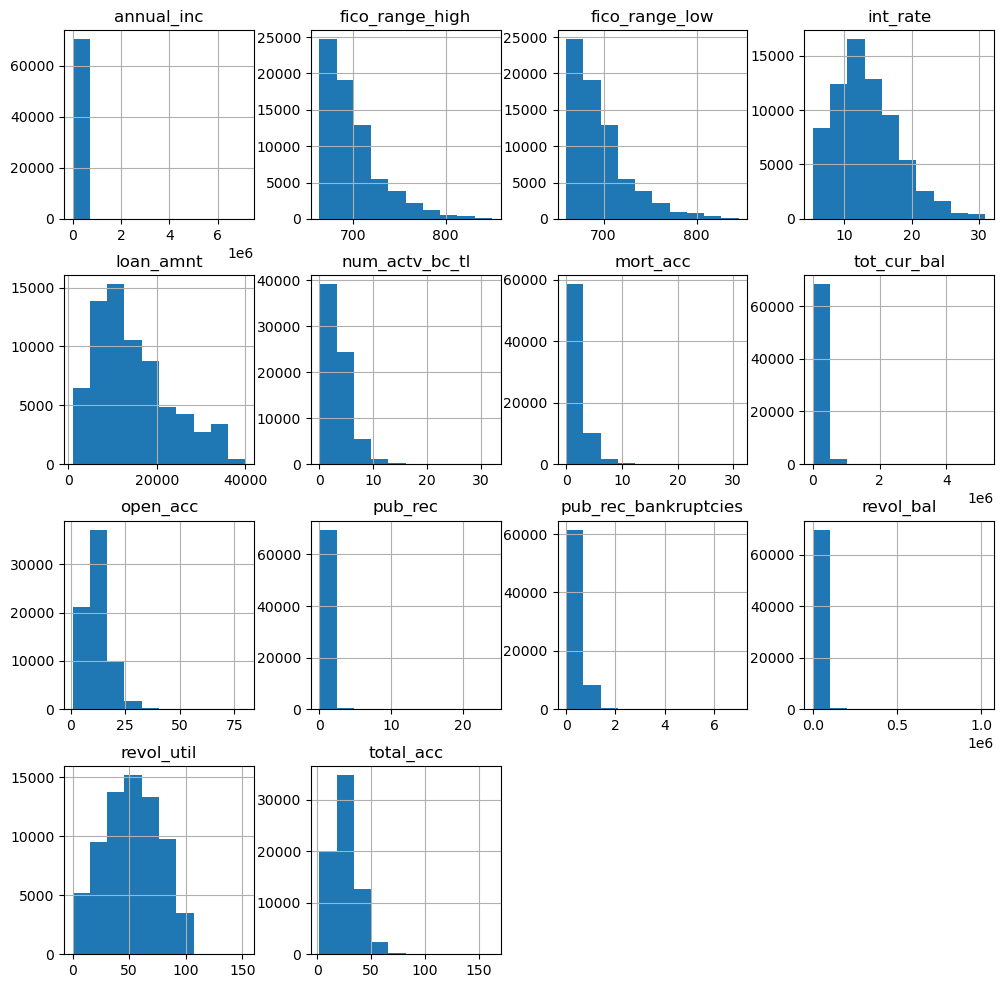

In [102]:
data.hist(figsize =(12, 12))
plt.show

In [103]:
data['loan_status']

0        Defaulted
1             Paid
2             Paid
3             Paid
4             Paid
           ...    
79995    Defaulted
79996         Paid
79997         Paid
79998         Paid
79999         Paid
Name: loan_status, Length: 70375, dtype: object

Graph of homeowners vs loan status

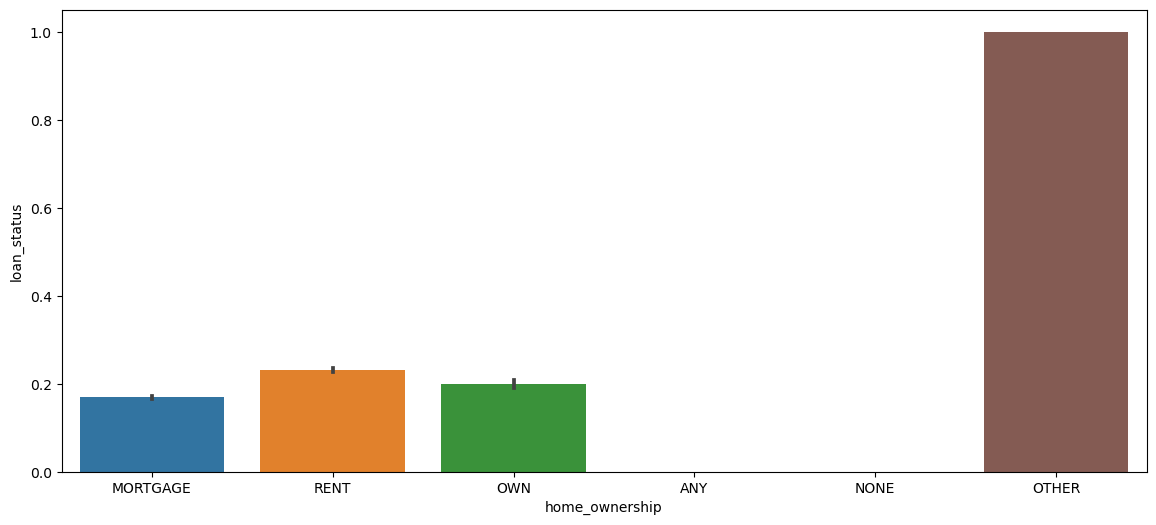

In [227]:
plt.figure(figsize=(14,6))
sns.barplot(x='home_ownership',y='loan_status',data=data)
plt.show()

Graph of Interest rate vs loan status

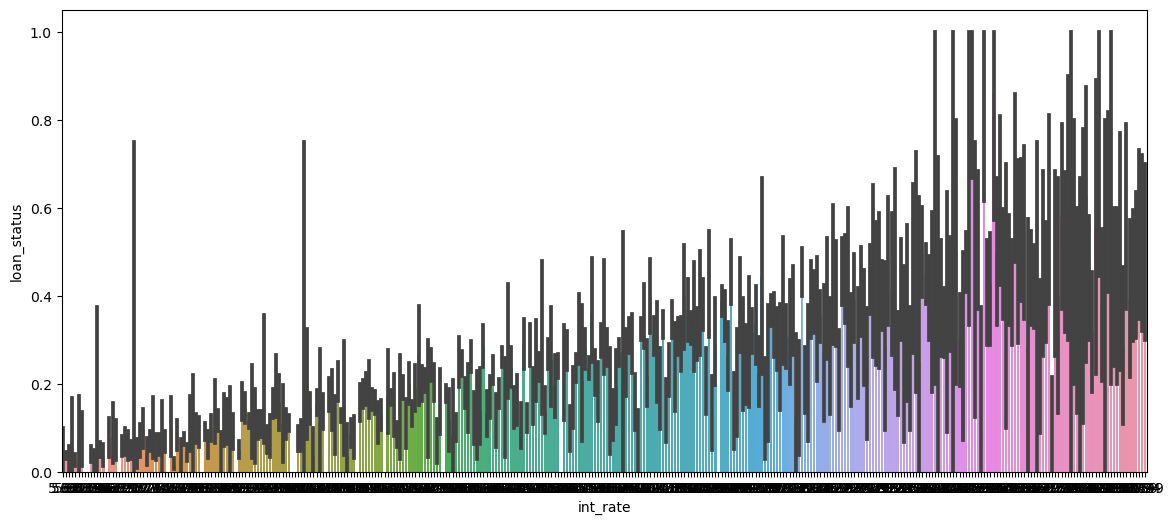

In [226]:
plt.figure(figsize=(14,6))
sns.barplot(x='int_rate',y='loan_status',data=data)
plt.show()

Graph of loan application type vs loan status i.e individual or joint applicant

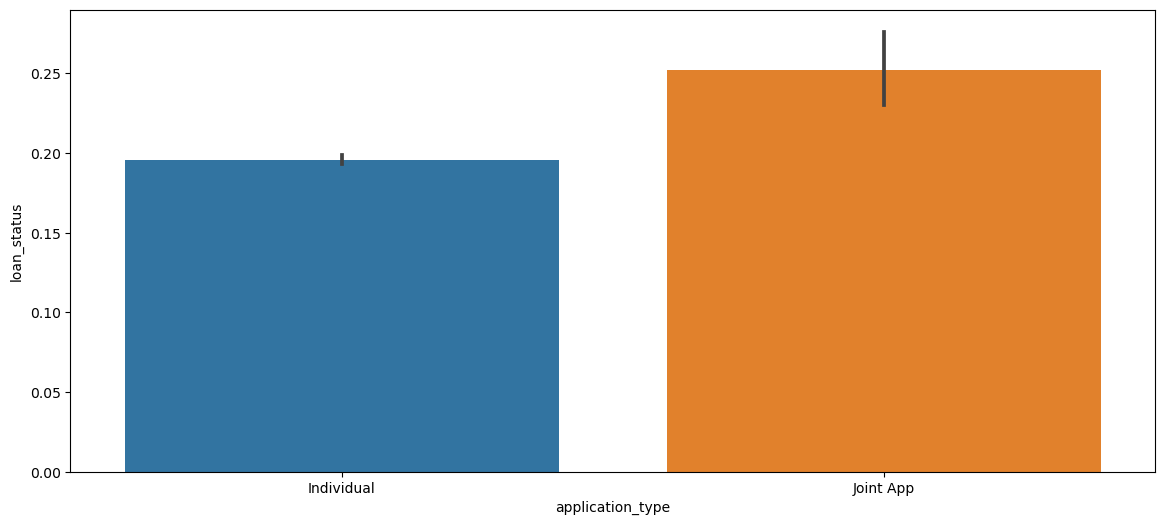

In [225]:
plt.figure(figsize=(14,6))
sns.barplot(x='application_type',y='loan_status',data=data)
plt.show()

Grapgh of grade vs loan status

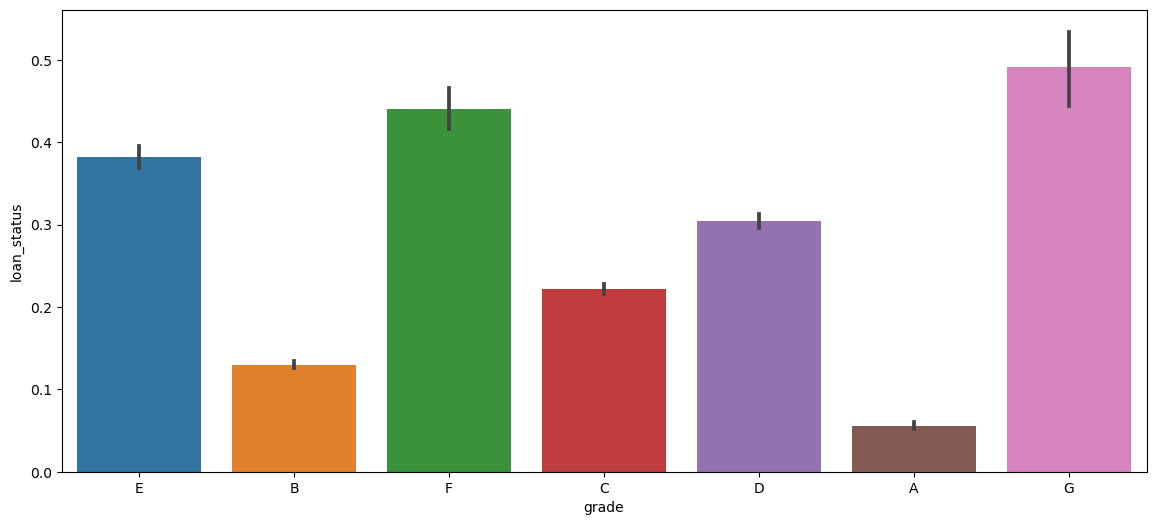

In [224]:
plt.figure(figsize=(14,6))
sns.barplot(x='grade',y='loan_status',data=data)
plt.show()

Graph of Loan amount vs status

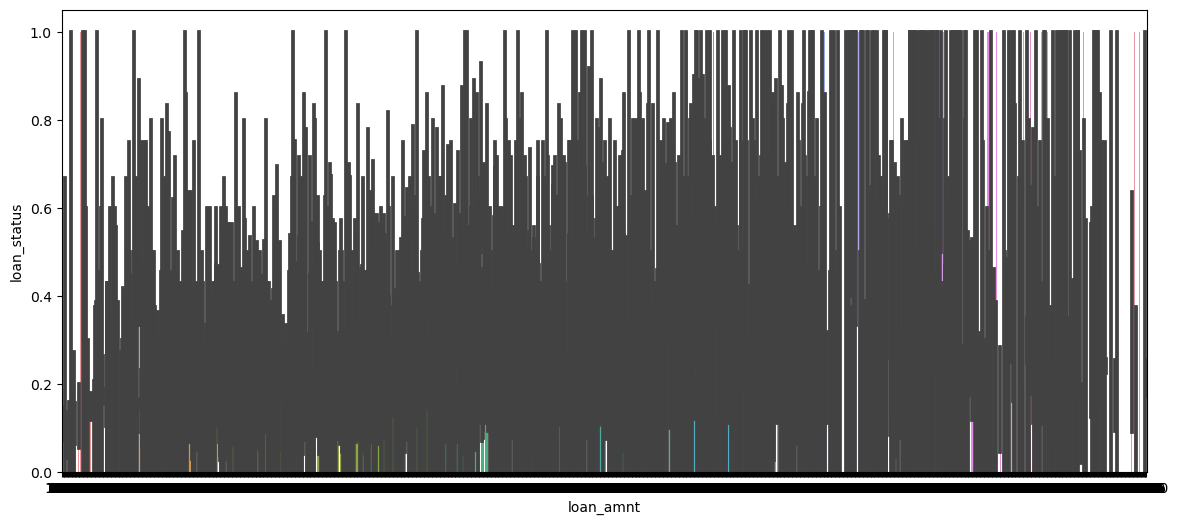

In [223]:
plt.figure(figsize=(14,6))
sns.barplot(x='loan_amnt',y='loan_status',data=data)
plt.show()

Term of loan vs status

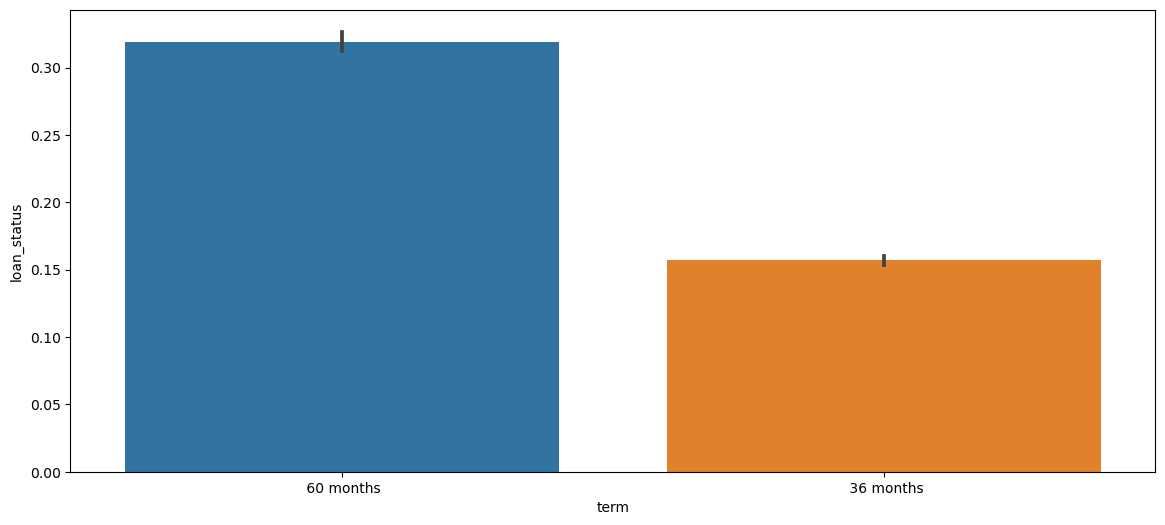

In [220]:
plt.figure(figsize=(14,6))
sns.barplot(x='term',y='loan_status',data=data)
plt.show()

Graph of Loan Applicants' Annual Income vs Loan Status

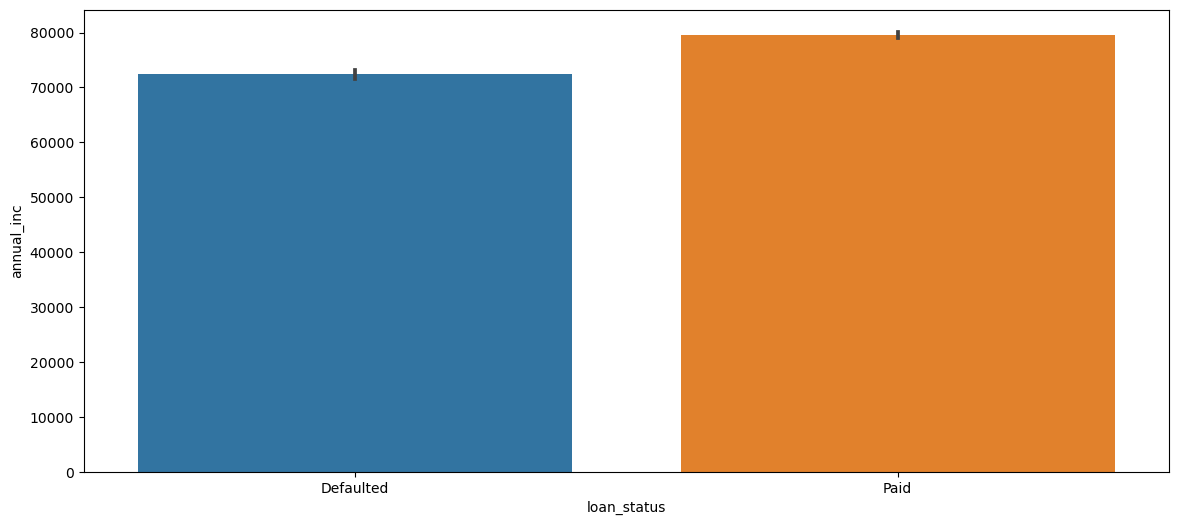

In [107]:
plt.figure(figsize=(14,6))
sns.barplot(x='loan_status',y='annual_inc',data=data)
plt.show()

Graph of Loan Applicants with high credit score vs Loan Status

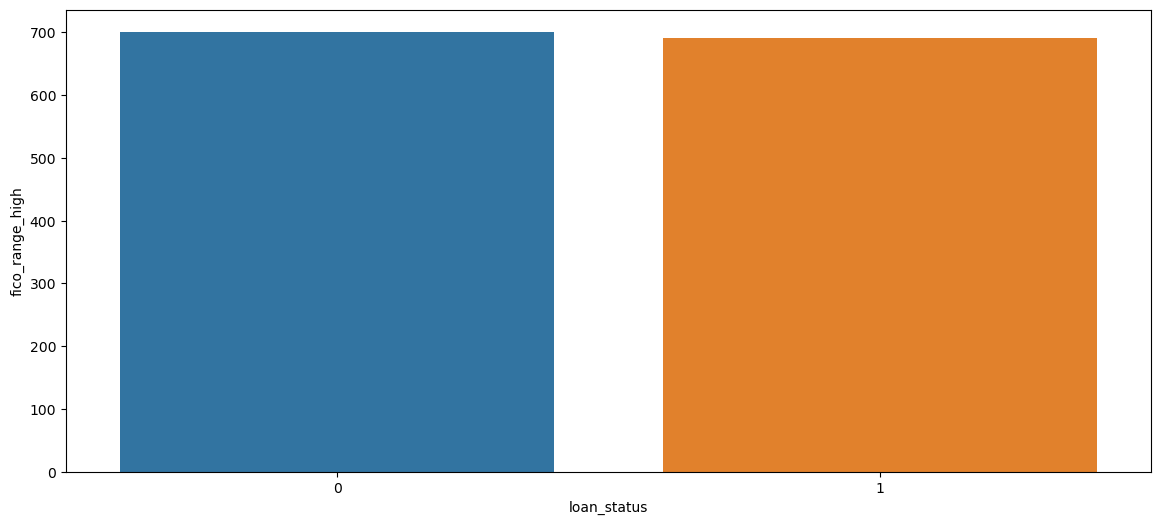

In [231]:
plt.figure(figsize=(14,6))
sns.barplot(x='loan_status',y='fico_range_high',data=data)
plt.show()

Graph of Loan Applicants with low credit score vs Loan Status

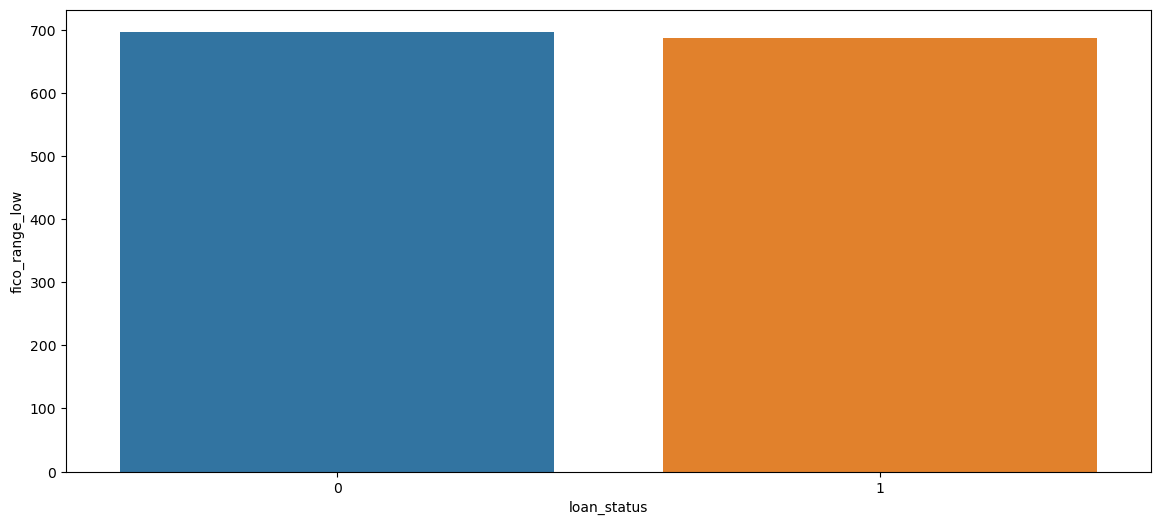

In [232]:
plt.figure(figsize=(14,6))
sns.barplot(x='loan_status',y='fico_range_low',data=data)
plt.show()

Graph of Loan Applicants with a history of bankruptcy vs Loan Status

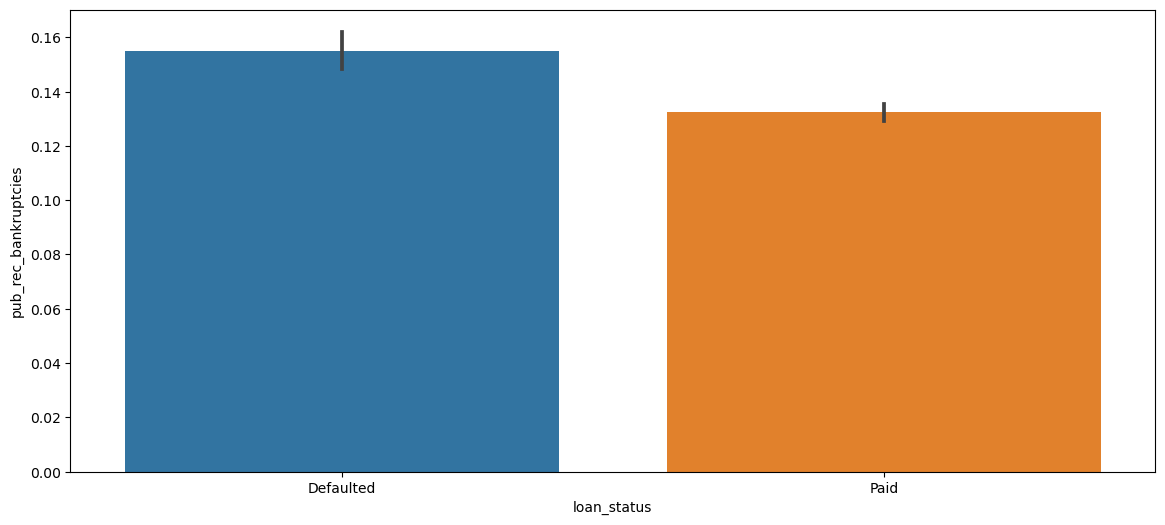

In [114]:
plt.figure(figsize=(14,6))
sns.barplot(x='loan_status',y='pub_rec_bankruptcies',data=data)
plt.show()

Show Outliers

<Figure size 1200x1200 with 0 Axes>

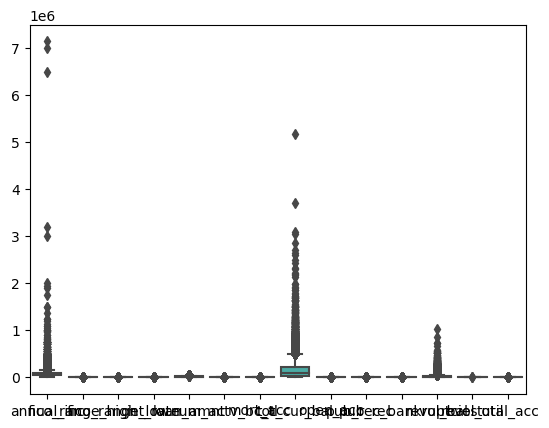

<Figure size 1200x1200 with 0 Axes>

In [125]:
sns.boxplot(data)
plt.figure(figsize=(12,12))

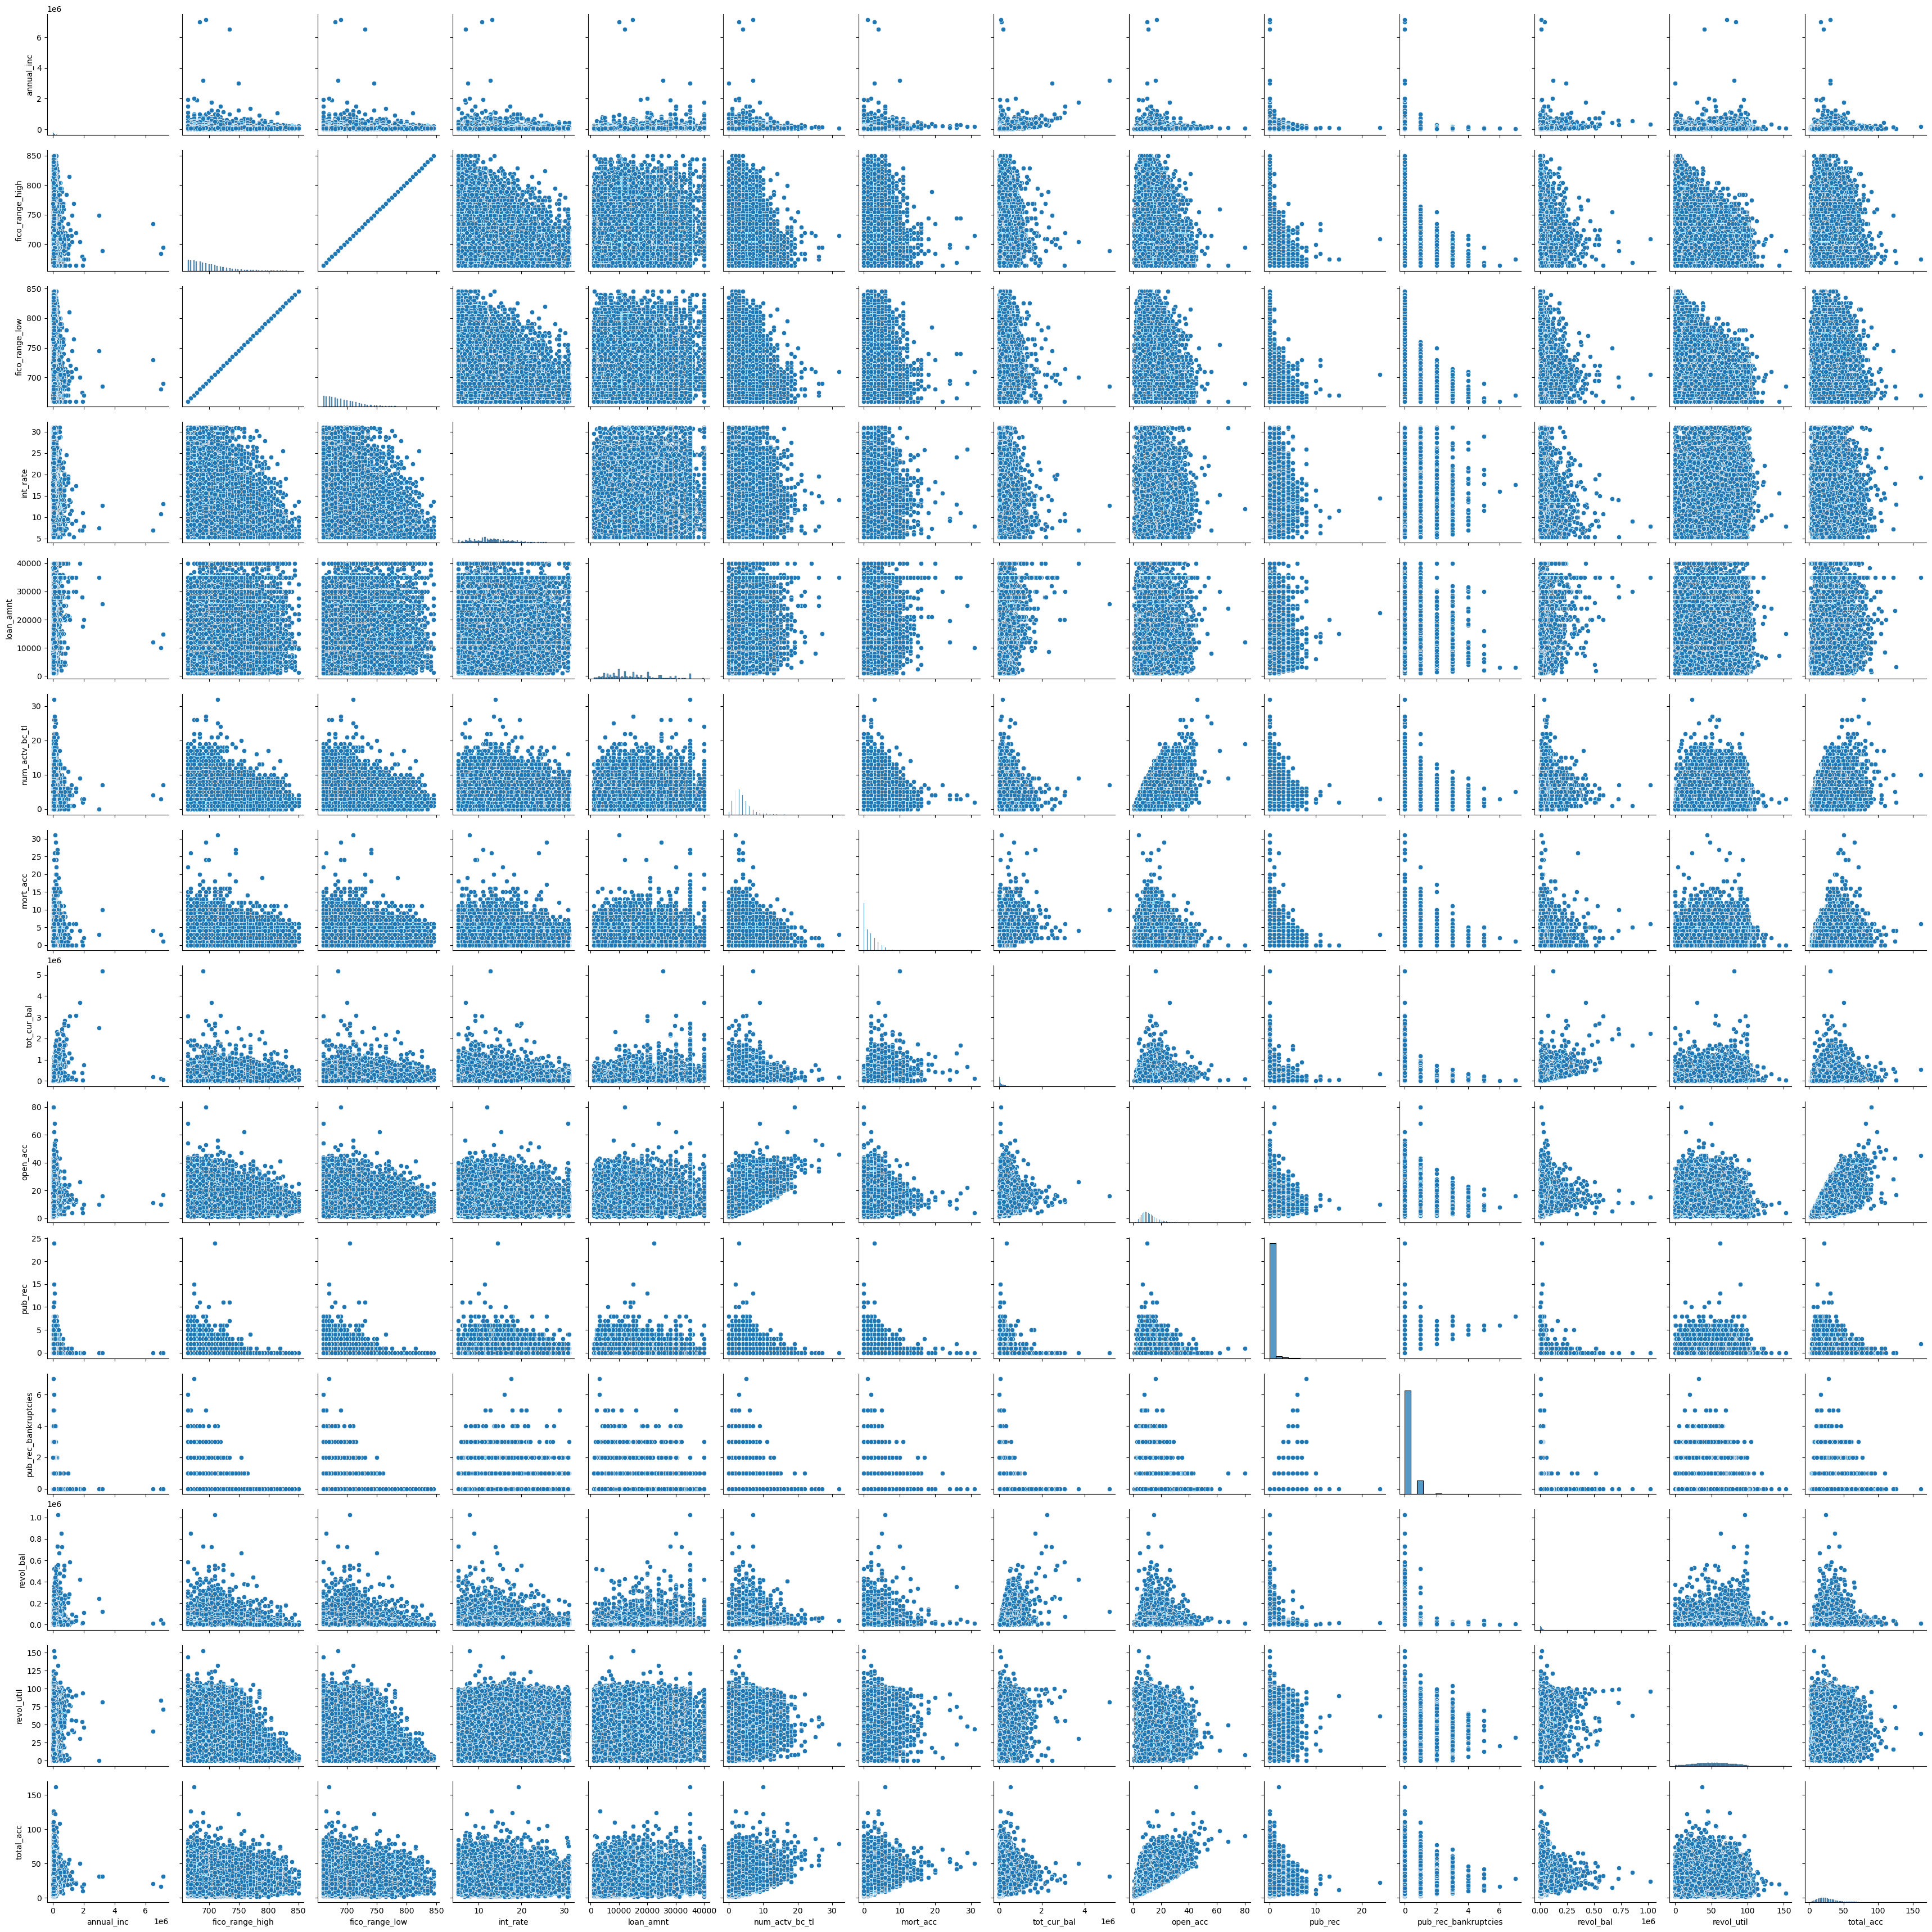

In [126]:
sns.pairplot(data)

In [127]:
data.corr()

C:\Users\kp881\AppData\Local\Temp\ipykernel_31472\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


annual_inc  fico_range_high  fico_range_low  int_rate  \
annual_inc              1.000000         0.070084        0.070085 -0.074722   
fico_range_high         0.070084         1.000000        1.000000 -0.387240   
fico_range_low          0.070085         1.000000        1.000000 -0.387244   
int_rate               -0.074722        -0.387240       -0.387244  1.000000   
loan_amnt               0.306816         0.109301        0.109301  0.139850   
num_actv_bc_tl          0.102823        -0.113497       -0.113498  0.025268   
mort_acc                0.219161         0.092565        0.092565 -0.078137   
tot_cur_bal             0.423999         0.136798        0.136800 -0.087695   
open_acc                0.121611         0.022659        0.022659 -0.006914   
pub_rec                -0.005771        -0.199108       -0.199111  0.055330   
pub_rec_bankruptcies   -0.040625        -0.200208       -0.200211  0.060958   
revol_bal               0.302678         0.027104        0.027108 -0.032580   
revol_util              0.040407        -0.449073       -0.449074  0.226709   
total_acc               0.159506         0.014930        0.014930 -0.042039   

                      loan_amnt  num_actv_bc_tl  mort_acc  tot_cur_bal  \
annual_inc             0.306816        0.102823  0.219161     0.423999   
fico_range_high        0.109301       -0.113497  0.092565     0.136798   
fico_range_low         0.109301       -0.113498  0.092565     0.136800   
int_rate               0.139850        0.025268 -0.078137    -0.087695   
loan_amnt              1.000000        0.197413  0.229430     0.306684   
num_actv_bc_tl         0.197413        1.000000  0.032985     0.097001   
mort_acc               0.229430        0.032985  1.000000     0.534762   
tot_cur_bal            0.306684        0.097001  0.534762     1.000000   
open_acc               0.173300        0.540614  0.112596     0.235638   
pub_rec               -0.062858       -0.035782 -0.005936    -0.068652   
pub_rec_bankruptcies  -0.086128       -0.057420  0.008874    -0.092960   
revol_bal              0.317532        0.299364  0.213367     0.455761   
revol_util             0.103841        0.105361  0.032730     0.082033   
total_acc              0.197723        0.290669  0.358473     0.300016   

                      open_acc   pub_rec  pub_rec_bankruptcies  revol_bal  \
annual_inc            0.121611 -0.005771             -0.040625   0.302678   
fico_range_high       0.022659 -0.199108             -0.200208   0.027104   
fico_range_low        0.022659 -0.199111             -0.200211   0.027108   
int_rate             -0.006914  0.055330              0.060958  -0.032580   
loan_amnt             0.173300 -0.062858             -0.086128   0.317532   
num_actv_bc_tl        0.540614 -0.035782             -0.057420   0.299364   
mort_acc              0.112596 -0.005936              0.008874   0.213367   
tot_cur_bal           0.235638 -0.068652             -0.092960   0.455761   
open_acc              1.000000 -0.012628             -0.013084   0.213838   
pub_rec              -0.012628  1.000000              0.681224  -0.093712   
pub_rec_bankruptcies -0.013084  0.681224              1.000000  -0.114511   
revol_bal             0.213838 -0.093712             -0.114511   1.000000   
revol_util           -0.148536 -0.074811             -0.092817   0.232455   
total_acc             0.702436  0.017497              0.048713   0.178937   

                      revol_util  total_acc  
annual_inc              0.040407   0.159506  
fico_range_high        -0.449073   0.014930  
fico_range_low         -0.449074   0.014930  
int_rate                0.226709  -0.042039  
loan_amnt               0.103841   0.197723  
num_actv_bc_tl          0.105361   0.290669  
mort_acc                0.032730   0.358473  
tot_cur_bal             0.082033   0.300016  
open_acc               -0.148536   0.702436  
pub_rec                -0.074811   0.017497  
pub_rec_bankruptcies   -0.092817   0.048713  
revol_bal        

C:\Users\kp881\AppData\Local\Temp\ipykernel_31472\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

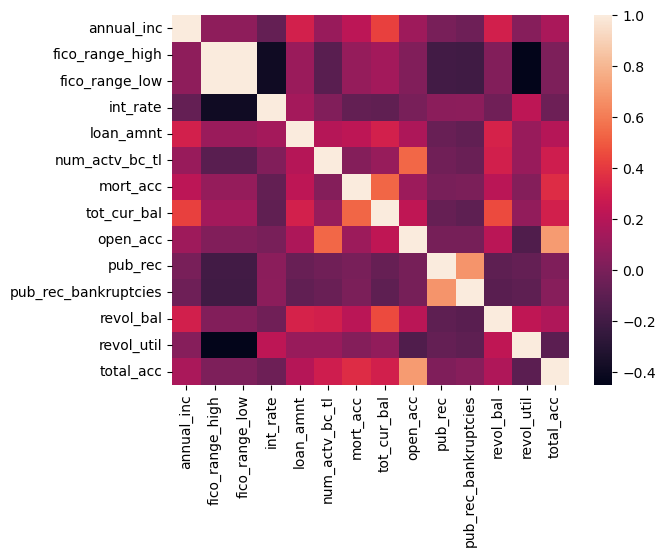

In [128]:
sns.heatmap(data.corr())

Insights

nearly half of joint applicant default
whereas as only less than a third of individual applicants pay when due

nearly all defaulter are in annual income of under 70k

F,G & E grade applicants are most likely to default

longer term loan applicants are more likely to default

applicants with higher interest rate tend to default

credit score of loan applicants was not too effective as they were nearly the same

In [131]:
data['loan_status'].value_counts()

Paid         56527
Defaulted    13848
Name: loan_status, dtype: int64

<Axes: >

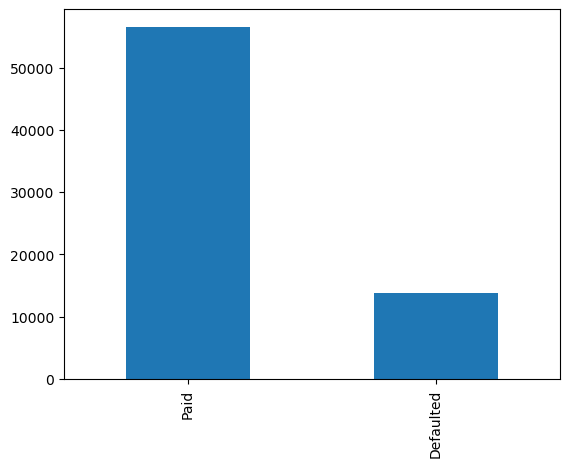

In [132]:
data["loan_status"].value_counts().plot(kind="bar")

In [139]:
data["loan_status"]=data['loan_status'].replace('Paid', 0)

C:\Users\kp881\AppData\Local\Temp\ipykernel_31472\2042369372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["loan_status"]=data['loan_status'].replace('Paid', 0)


In [141]:
data["loan_status"]=data['loan_status'].replace('Defaulted', 1)

C:\Users\kp881\AppData\Local\Temp\ipykernel_31472\532278957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["loan_status"]=data['loan_status'].replace('Defaulted', 1)


In [142]:
data['loan_status'].value_counts()

0    56527
1    13848
Name: loan_status, dtype: int64

Coverting Loan Status to numeric

In [215]:
data.corr()

C:\Users\kp881\AppData\Local\Temp\ipykernel_31472\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


annual_inc  fico_range_high  fico_range_low  int_rate  \
annual_inc              1.000000         0.070084        0.070085 -0.074722   
fico_range_high         0.070084         1.000000        1.000000 -0.387240   
fico_range_low          0.070085         1.000000        1.000000 -0.387244   
int_rate               -0.074722        -0.387240       -0.387244  1.000000   
loan_amnt               0.306816         0.109301        0.109301  0.139850   
num_actv_bc_tl          0.102823        -0.113497       -0.113498  0.025268   
mort_acc                0.219161         0.092565        0.092565 -0.078137   
tot_cur_bal             0.423999         0.136798        0.136800 -0.087695   
open_acc                0.121611         0.022659        0.022659 -0.006914   
pub_rec                -0.005771        -0.199108       -0.199111  0.055330   
pub_rec_bankruptcies   -0.040625        -0.200208       -0.200211  0.060958   
revol_bal               0.302678         0.027104        0.027108 -0.032580   
revol_util              0.040407        -0.449073       -0.449074  0.226709   
total_acc               0.159506         0.014930        0.014930 -0.042039   
loan_status            -0.039910        -0.125939       -0.125941  0.257363   

                      loan_amnt  num_actv_bc_tl  mort_acc  tot_cur_bal  \
annual_inc             0.306816        0.102823  0.219161     0.423999   
fico_range_high        0.109301       -0.113497  0.092565     0.136798   
fico_range_low         0.109301       -0.113498  0.092565     0.136800   
int_rate               0.139850        0.025268 -0.078137    -0.087695   
loan_amnt              1.000000        0.197413  0.229430     0.306684   
num_actv_bc_tl         0.197413        1.000000  0.032985     0.097001   
mort_acc               0.229430        0.032985  1.000000     0.534762   
tot_cur_bal            0.306684        0.097001  0.534762     1.000000   
open_acc               0.173300        0.540614  0.112596     0.235638   
pub_rec               -0.062858       -0.035782 -0.005936    -0.068652   
pub_rec_bankruptcies  -0.086128       -0.057420  0.008874    -0.092960   
revol_bal              0.317532        0.299364  0.213367     0.455761   
revol_util             0.103841        0.105361  0.032730     0.082033   
total_acc              0.197723        0.290669  0.358473     0.300016   
loan_status            0.068052        0.039641 -0.074914    -0.070786   

                      open_acc   pub_rec  pub_rec_bankruptcies  revol_bal  \
annual_inc            0.121611 -0.005771             -0.040625   0.302678   
fico_range_high       0.022659 -0.199108             -0.200208   0.027104   
fico_range_low        0.022659 -0.199111             -0.200211   0.027108   
int_rate             -0.006914  0.055330              0.060958  -0.032580   
loan_amnt             0.173300 -0.062858             -0.086128   0.317532   
num_actv_bc_tl        0.540614 -0.035782             -0.057420   0.299364   
mort_acc              0.112596 -0.005936              0.008874   0.213367   
tot_cur_bal           0.235638 -0.068652             -0.092960   0.455761   
open_acc              1.000000 -0.012628             -0.013084   0.213838   
pub_rec              -0.012628  1.000000              0.681224  -0.093712   
pub_rec_bankruptcies -0.013084  0.681224              1.000000  -0.114511   
revol_bal             0.213838 -0.093712             -0.114511   1.000000   
revol_util           -0.148536 -0.074811             -0.092817   0.232455   
total_acc             0.702436  0.017497              0.048713   0.178937   
loan_status           0.033967  0.025247              0.023353  -0.022271   

                      revol_util  total_acc  loan_status  
annual_inc              0.040407   0.159506    -0.039910  
fico_range_high        -0.449073   0.014930    -0.125939  
fico_range_low         -0.449074   0.014930    -0.125941  
int_rate                0.226709  -0.042039     0.257363  
loan_amnt               0.103841   0.197723 

C:\Users\kp881\AppData\Local\Temp\ipykernel_31472\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

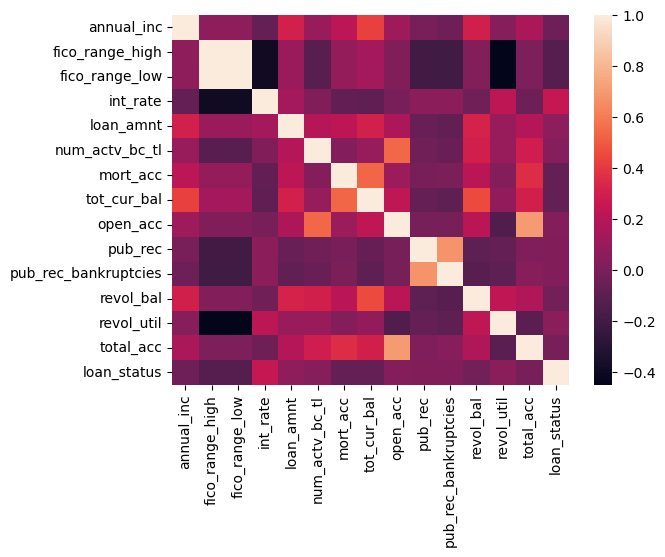

In [216]:
sns.heatmap(data.corr())

In [143]:
X = data.drop('loan_status', axis=1)
Y = data['loan_status']

In [144]:
model=sm.Logit(Y,X)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and addr_state               object
annual_inc              float64
earliest_cr_line         object
emp_length               object
emp_title                object
fico_range_high           int64
fico_range_low            int64
grade                    object
home_ownership           object
application_type         object
initial_list_status      object
int_rate                float64
loan_amnt                 int64
num_actv_bc_tl          float64
mort_acc                float64
tot_cur_bal             float64
open_acc                  int64
pub_rec                   int64
pub_rec_bankruptcies    float64
purpose                  object
revol_bal                 int64
revol_util              float64
sub_grade                object
term                     object
title                    object
total_acc                 int64
verification_status      object
dtype: object. The data was
0        1
1        0
2        0
3        0
4        0
        ..
79995    1
79996    0
79997    0
79998    0
79999    0
Name: loan_status, Length: 70375, dtype: int64
and
       addr_state  annual_inc earliest_cr_line emp_length  \
0             CO     85000.0           Jul-97  10+ years   
1             CA     40000.0           Apr-87  10+ years   
2             FL     60000.0           Aug-07  10+ years   
3             IL    100742.0           Sep-80  10+ years   
4             MD     80000.0           Jul-99  10+ years   
...          ...         ...              ...        ...   
79995         SC     81000.0           Feb-00  10+ years   
79996         NH     45000.0           Aug-95  10+ years   
79997         NY     90000.0           Apr-05   < 1 year   
79998         TX     94000.0           Apr-92    3 years   
79999         NY   1100000.0           Jun-99    2 years   

                            emp_title  fico_range_high  fico_range_low grade  \
0                              Deputy              744             740     E   
1      Department of Veterans Affairs              724             720     B   
2                    Marble polishing              679             675     B   
3                             printer              664             660     B   
4                       Southern Mgmt              669             665     F   
...                               ...              ...             ...   ...   
79995            Sports Group Manager              664             660     G   
79996                    Web Designer              684             680     C   
79997                 Program Officer              724             720     B   
79998            Sr. Business Analyst              669             665     D   
79999               Managing Director              664             660     B   

      home_ownership application_type  ... pub_rec  pub_rec_bankruptcies  \
0           MORTGAGE       Individual  ...       0                   0.0   
1               RENT       Individual  ...       0                   0.0   
2           MORTGAGE       Individual  ...       0                   0.0   
3           MORTGAGE       Individual  ...       0                   0.0   
4               RENT       Individual  ...       0                   0.0   
...              ...              ...  ...     ...                   ...   
79995       MORTGAGE       Individual  ...       0                   0.0   
79996       MORTGAGE       Individual  ...       0                   0.0   
79997            OWN       Individual  ...       0                   0.0   
79998       MORTGAGE       Individual  ...       1                   1.0   
79999       MORTGAGE       Individual  ...       0                   0.0   

                  purpose  revol_bal  revol_util  sub_grade        term  \
0      debt_consolidation       5338        93.6         E1   60 months   
1      debt_consolidation      19944        60.3         B1   36 months   
2      debt_consolidation      23199        88.5         B5   36 months   
3      debt_consolidation      18425        69.0         B2   36 months   
4      debt_consolidation      34370        90.0         F5   60 months   
...                   ...        ...         ...        ...         ...   
79995  debt_consolidation      20201        93.5         G3   60 months   
79996  debt_consolidation       6145        56.9         C1   36 months   
79997  debt_consolidation       3910        25.6         B4   36 months   
79998         credit_card      11897        49.4         D5   60 months   
79999  debt_consolidation     586259        96.7         B4   36 months   

                         title  total_acc verification_status  
0           Debt consolidation          8     Source Verified  
1                  Credit Loan         12            Verified  
2           Debt consolidation         16     Source Verified  
3           Debt consolidation         19     Source Verified  
4          Debt Connsolidation         59            Verified  
...                        ...        ...                 ...  
79995       Debt consolidation         42            Verified  
79996       Debt consolidation         14        Not Verified  
79997       Debt consolidation         26     Source Verified  
79998  Credit card refinancing         48     Source Verified  
79999       Debt consolidation         32     Source Verified  

[70375 rows x 27 columns]
before. After,
[1 0 0 ... 0 0 0]
[['CO' 85000.0 'Jul-97' ... 'Debt consolidation' 8 'Source Verified']
 ['CA' 40000.0 'Apr-87' ... 'Credit Loan' 12 'Verified']
 ['FL' 60000.0 'Aug-07' ... 'Debt consolidation' 16 'Source Verified']
 ...
 ['NY' 90000.0 'Apr-05' ... 'Debt consolidation' 26 'Source Verified']
 ['TX' 94000.0 'Apr-92' ... 'Credit card refinancing' 48
  'Source Verified']
 ['NY' 1100000.0 'Jun-99' ... 'Debt consolidation' 32 'Source Verified']].

<function matplotlib.pyplot.show(close=None, block=None)>

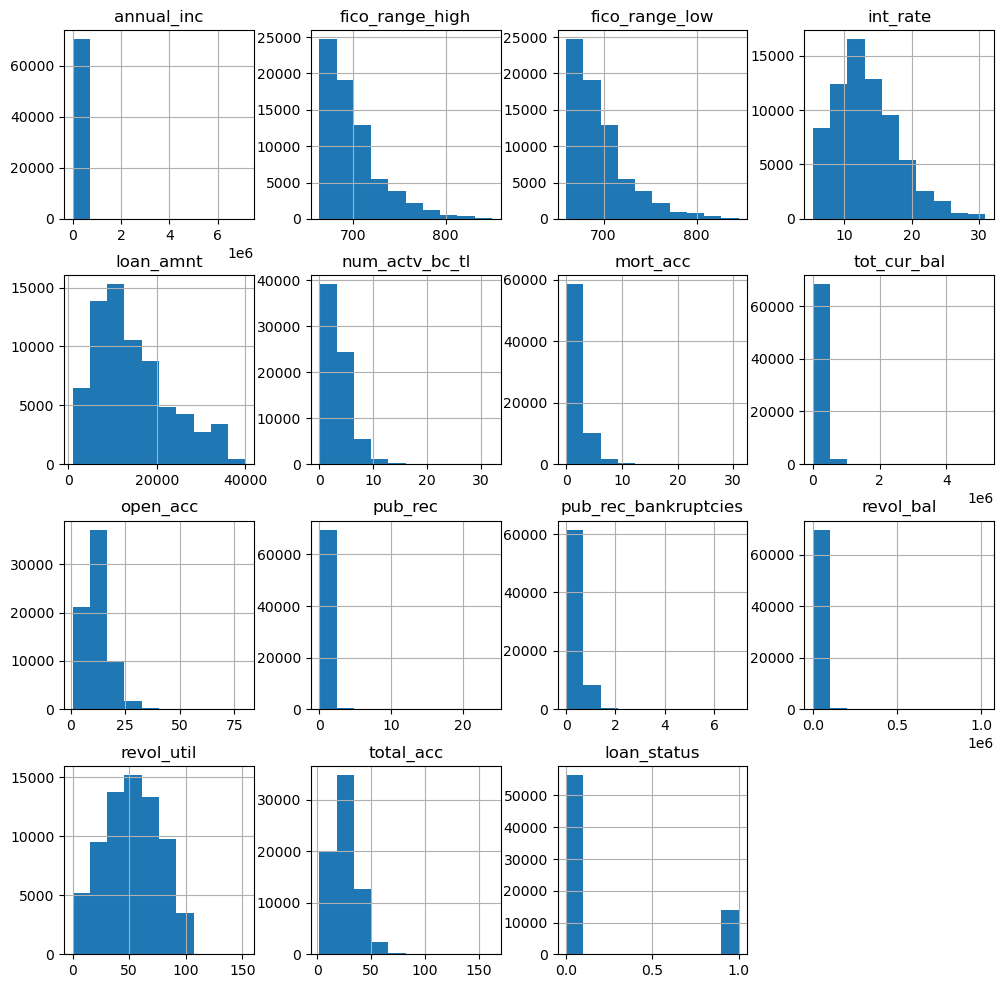

In [145]:
data.hist(figsize =(12, 12))
plt.show

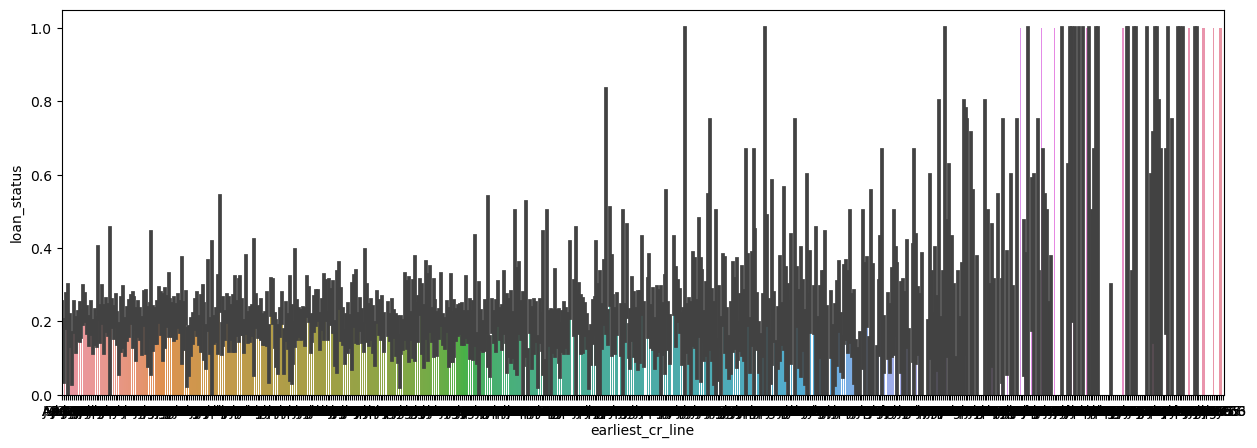

In [149]:
plt.figure(figsize=(15,5))
sns.barplot(x='earliest_cr_line',y='loan_status',data=data)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


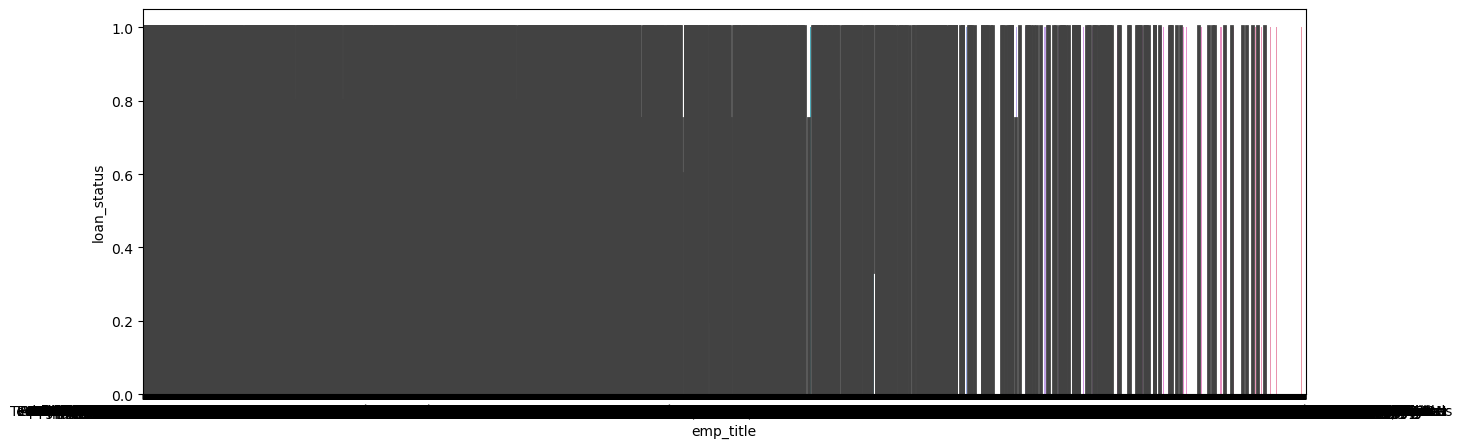

In [155]:
plt.figure(figsize=(15,5))
sns.barplot(x='emp_title',y='loan_status',data=data)
plt.show()

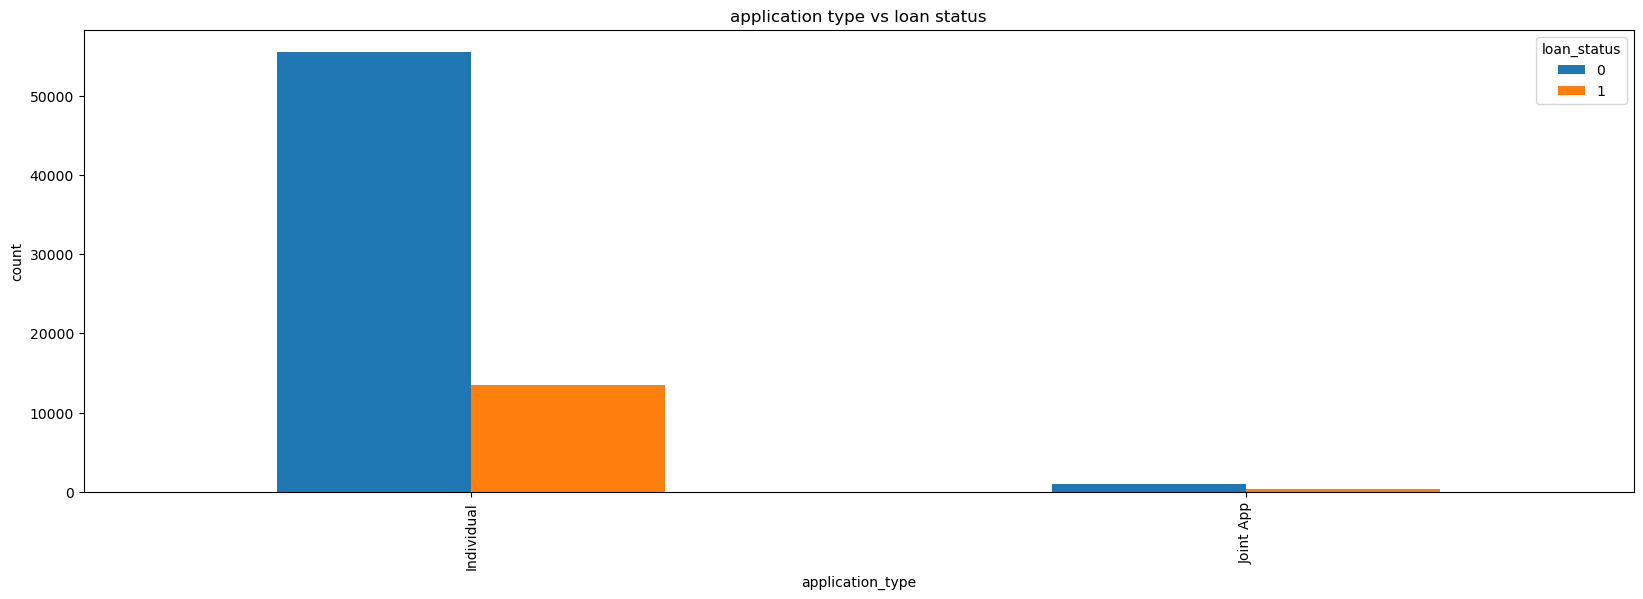

In [153]:
pd.crosstab(data.application_type, data.loan_status).plot(kind="bar",figsize=(20,6))
plt.title("application type vs loan status")
plt.xlabel('application_type')
plt.ylabel('l')
plt.show()

In [156]:
x=data[['annual_inc','fico_range_high','fico_range_low','int_rate','loan_amnt','num_actv_bc_tl','mort_acc','tot_cur_bal','open_acc','pub_rec_bankruptcies','pub_rec','revol_bal','revol_util','total_acc']]
x=sm.add_constant(x)
y= data[['loan_status']]
x_tr, x_te, y_tr, y_te = train_test_split(x,y, random_state=0)

In [157]:
model=sm.Logit(y,x)

In [158]:
res=model.fit()

Optimization terminated successfully.
         Current function value: 0.457594
         Iterations 7


In [159]:
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                70375
Model:                          Logit   Df Residuals:                    70360
Method:                           MLE   Df Model:                           14
Date:                Sun, 05 Nov 2023   Pseudo R-squ.:                 0.07724
Time:                        19:25:53   Log-Likelihood:                -32203.
converged:                       True   LL-Null:                       -34899.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.9944      4.244     -0.234      0.815      -9.313       7.324
annual_inc           -2.052e-06   2.95e-07     -6.950      0.000   -2.63e-06   -1.47e-06
fico_range_h

Balancing the data , Logistic Regression and Hyperparameter tuning with Random Forest Model

In [161]:
X = data.drop('loan_status', axis=1)
Y = data['loan_status']

In [162]:
X.shape

(70375, 27)

In [163]:
Y.shape

(70375,)

In [179]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


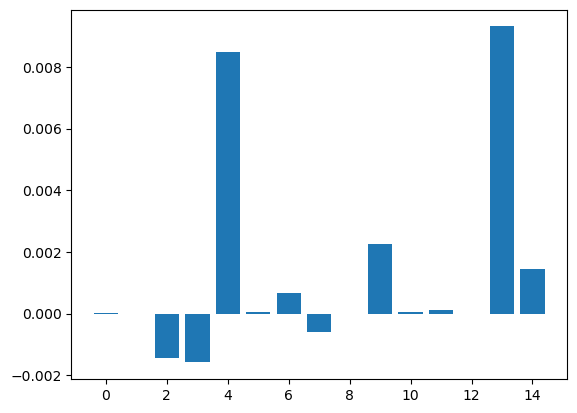

In [170]:
model = LogisticRegression()

model.fit(x, y)


importance = model.coef_[0]

plt.bar([x for x in range(len(importance))], importance)
plt.show()
    


In [171]:
y_hat=(res.predict(x)>=0.5).astype(int)

In [172]:
y_hat

0        0
1        0
2        0
3        0
4        1
        ..
79995    0
79996    0
79997    0
79998    0
79999    0
Length: 70375, dtype: int32

In [173]:
confusion_matrix=res.pred_table(threshold=0.5)
confusion_matrix

array([[55694.,   833.],
       [13071.,   777.]])

In [174]:
accuracy=(confusion_matrix[0,0]+ confusion_matrix[1,1])/len(y_hat)
print("Accuracy of data = ", accuracy*100,"%")

Accuracy of data =  80.2429840142096 %


In [183]:
oversampler = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(x_tr, y_tr)


In [187]:
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)


C:\Users\kp881\AppData\Local\Temp\ipykernel_31472\1425495848.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled, y_resampled)


RandomForestClassifier(random_state=42)

In [205]:
rd_clf = RandomForestClassifier()
rd_clf.fit(x_tr, y_tr)

y_pred_rd_clf = rd_clf.predict(x_te)

accuracy = accuracy_score(y_te, y_pred_rd_clf)
confsnmatrix = confusion_matrix(y_te, y_pred_rd_clf)

C:\Users\kp881\AppData\Local\Temp\ipykernel_31472\193512347.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rd_clf.fit(x_tr, y_tr)


In [206]:
accuracy

0.8008980334204843

In [208]:
confsnmatrix

array([[13925,   165],
       [ 3338,   166]], dtype=int64)

Test data with Loan_status

In [212]:
testdata['loan_status']=traindata['loan_status']

In [213]:
testdata

addr_state  annual_inc earliest_cr_line emp_length  \
0             MO     50000.0         May-2012     1 year   
1             HI     92000.0         Dec-2001  10+ years   
2             TX     89000.0         Mar-1989  10+ years   
3             CA     33000.0         Nov-2004    9 years   
4             MI     35580.0         Feb-1997        NaN   
...          ...         ...              ...        ...   
19995         MO     38500.0         Sep-2010    4 years   
19996         VA     80000.0         Dec-1998    3 years   
19997         TX     95000.0         May-1996  10+ years   
19998         FL     35000.0         Mar-2003  10+ years   
19999         FL     30700.0         Apr-1994   < 1 year   

                               emp_title  fico_range_high  fico_range_low  \
0                       Tower technician            719.0           715.0   
1                             Supervisor            684.0           680.0   
2                APPLICATIONS PROGRAMMER            679.0           675.0   
3      San Diego Unified School District            674.0           670.0   
4                                    NaN            704.0           700.0   
...                                  ...              ...             ...   
19995               lighting coordinator            679.0           675.0   
19996      Contract & Compliance Manager            674.0           670.0   
19997                         Pharmacist            729.0           725.0   
19998                Manager In Training            809.0           805.0   
19999                      rv technician            664.0           660.0   

      grade home_ownership application_type  ... pub_rec_bankruptcies  \
0         C            OWN       Individual  ...                  0.0   
1         B           RENT       Individual  ...                  0.0   
2         B       MORTGAGE       Individual  ...                  0.0   
3         C           RENT       Individual  ...                  1.0   
4         B       MORTGAGE       Individual  ...                  0.0   
...     ...            ...              ...  ...                  ...   
19995     D           RENT       Individual  ...                  0.0   
19996     D       MORTGAGE       Individual  ...                  0.0   
19997     B       MORTGAGE       Individual  ...                  0.0   
19998     A       MORTGAGE       Individual  ...                  0.0   
19999     E       MORTGAGE       Individual  ...                  0.0   

                  purpose  revol_bal  revol_util  sub_grade        term  \
0      debt_consolidation     2568.0         9.8         C4   36 months   
1      debt_consolidation    30394.0        75.4         B2   36 months   
2             credit_card    38400.0        75.3         B2   60 months   
3      debt_consolidation    21224.0        69.4         C1   36 months   
4      debt_consolidation     3471.0        39.4         B5   36 months   
...                   ...        ...         ...        ...         ...   
19995  debt_consolidation     5816.0        60.0         D4   36 months   
19996  debt_consolidation    13886.0        75.1         D4   60 months   
19997  debt_consolidation    43166.0        60.7         B5   36 months   
19998                 car     1110.0         4.4         A5   36 months   
19999  debt_consolidation     8910.0        78.8         E1   60 months   

                         title  total_acc  verification_status loan_status  
0           Debt consolidation       11.0      Source Verified   Defaulted  
1           Debt consolidation       35.0      Source Verified        Paid  
2      Credit card refinancing       41.0         Not Verified        Paid  
3               Breathing Room       16.0         Not Verified        Paid  
4           debitconsolidation       19.0             Verified        Paid  
...                        ...        ...                  ...         ...  
19995       Debt consolidation       10.0  

The above models yield us an accuracy of 80%